<a href="https://colab.research.google.com/github/Patricia7sp/Desafios-DataScience/blob/main/desafio_3_santander_Usando_Biblioteca_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<

# Desafio 3

# Santander Kaggle
## Customer Transaction Prediction

"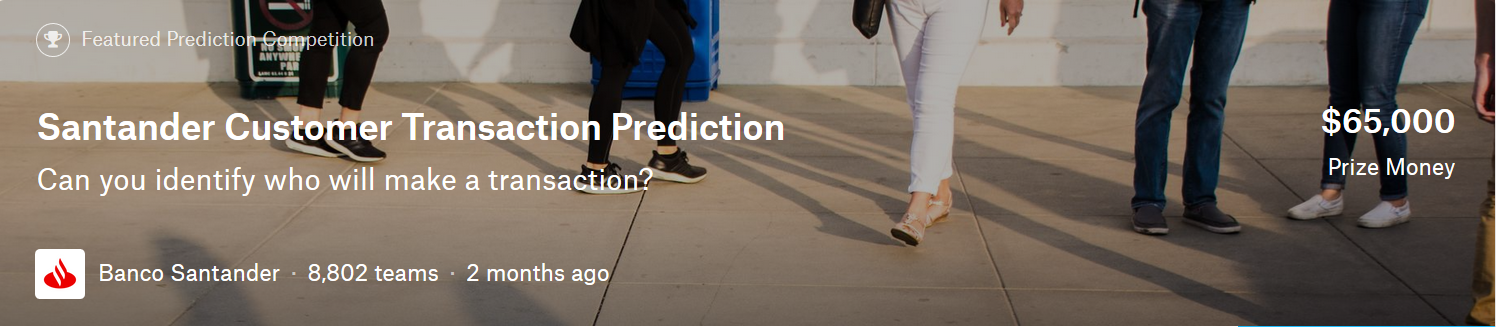"  >

### Neste desafio será necessário prever a variável target do DataSet


## Santander: Overview da proposta do desafio


Neste desafio, convidamos a Kagglers a nos ajudar a identificar quais clientes farão uma transação específica no futuro, independentemente do volume de dinheiro transacionado. Os dados fornecidos para esta competição têm a mesma estrutura que os dados reais que temos disponíveis para resolver este problema.

## Desenvolvendo o modelo com os pacotes da biblioteca pycaret

In [ ]:
!pip install pycaret 

     |████████████████████████████████| 256kB 5.9MB/s 
     |████████████████████████████████| 1.8MB 36.4MB/s 
     |████████████████████████████████| 174kB 24.5MB/s 
     |████████████████████████████████| 266kB 40.8MB/s 
     |████████████████████████████████| 276kB 40.5MB/s 
     |████████████████████████████████| 6.8MB 26.4MB/s 
     |████████████████████████████████| 66.3MB 122kB/s 
     |████████████████████████████████| 13.9MB 42.5MB/s 
     |████████████████████████████████| 148.9MB 87kB/s 
     |████████████████████████████████| 1.6MB 47.4MB/s 
     |████████████████████████████████| 102kB 6.4MB/s 
     |████████████████████████████████| 3.1MB 39.8MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 604kB 42.1MB/s 
     |████████████████████████████████| 153kB 49.0MB/s 
     |████████████████████████████████| 337kB 50.4MB/s 
     |████████████████████████████████| 1.1MB 37.4MB/

### 1.9 Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpim
import scipy.stats as st
from scipy import stats
from statsmodels.formula.api  import ols

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
df_train = pd.read_csv('train.csv', sep=',')

In [25]:
df_train.shape

(9727, 202)

In [26]:
train_test = df_train.iloc[1000:2000]
train_test

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
1000,train_1000,0,8.5826,-8.3369,10.1053,10.2773,12.3695,-0.5861,4.6452,21.4091,-4.7384,7.9352,6.8037,-4.2993,13.6579,4.6240,4.2282,14.3977,9.5637,-11.0093,29.8587,19.3854,15.3318,15.3018,3.9714,2.2786,7.5562,13.2724,-4.8834,-3.3659,5.2959,10.2652,-6.8844,6.3780,0.9125,15.1357,11.4973,14.8459,3.1024,6.8651,...,38.8782,5.7300,5.4290,8.5103,-6.9220,21.7175,2.4122,10.2263,0.0940,5.1851,0.0764,-3.6072,14.9661,-0.6448,16.3635,13.7574,5.7103,11.3552,7.3526,1.1378,9.7033,8.6955,12.6241,1.6122,12.9741,-1.2406,12.3897,-20.9001,18.9806,0.8444,2.0163,9.2570,0.9863,3.7194,13.8578,0.8077,10.1349,9.7018,17.7495,-9.2302
1001,train_1001,0,13.7080,-10.4985,9.1846,5.6701,12.7300,-5.8418,3.9331,18.3771,3.9768,9.8398,-4.8167,4.2061,14.2427,4.7457,9.1839,14.8513,5.9884,-0.6321,17.6229,16.4822,23.8021,17.3641,3.6543,3.7763,16.4873,13.1439,-14.1787,1.0091,6.4923,4.2734,-0.1524,12.8056,2.6476,17.9399,11.5394,2.2341,4.9386,4.1467,...,34.7380,5.6642,6.3292,8.3443,-9.5304,27.7695,2.4371,-10.6314,0.0436,5.6248,1.6213,5.8899,16.9057,5.1291,11.9069,17.0040,4.3292,7.7897,-13.6555,1.4883,-3.8633,11.3020,-6.6812,12.6704,11.7903,-1.1667,7.4246,-10.4574,10.9565,-0.1532,-3.4061,9.8111,2.8511,2.7865,19.5933,-0.4843,6.8172,8.4074,13.9751,-7.1172
1002,train_1002,0,12.9621,0.7124,8.5301,8.3386,10.9782,3.0556,4.7670,23.1598,-1.6694,8.4942,-2.3122,-3.6822,13.9785,6.5678,11.2811,14.2298,7.2376,-0.7642,17.4206,18.6324,7.1496,26.2735,4.1470,3.8375,14.7118,13.6532,2.0361,-1.8286,5.9280,6.2494,-14.2730,7.6978,-3.4185,23.8573,11.7943,1.8310,0.4694,7.3759,...,17.6256,5.8705,3.5787,8.9341,5.3353,21.6432,2.5591,4.1879,7.2546,6.0189,3.2103,-5.0443,27.3510,-4.5530,29.4447,11.9611,-7.5366,15.4579,-7.9023,4.8296,-13.1027,8.5334,13.7558,5.0007,9.1700,-9.2842,11.4743,-0.6881,16.1950,0.0547,-2.5976,6.0758,1.9013,0.6801,20.9411,-1.6281,-5.0993,10.1068,21.3219,-6.3615
1003,train_1003,0,13.6811,-2.4476,13.0882,8.3289,12.1988,-3.0825,7.1168,14.1075,6.7418,8.8239,1.7736,-1.6434,13.9350,10.3691,7.4251,14.2610,12.0050,-1.2932,8.2237,14.4303,19.3442,8.9393,2.4876,3.2155,13.8967,13.7201,-4.9106,0.5372,5.1083,6.1470,3.2664,8.8653,-1.6423,14.1893,11.8528,2.2072,2.8789,5.6818,...,23.1000,5.9054,6.2759,7.2821,4.0171,17.0257,3.3696,-1.9250,7.5287,5.9035,-4.3815,0.5063,24.5891,11.7893,19.4265,13.4257,-6.1674,7.2654,-8.5893,1.2843,-12.5951,10.5055,-12.7017,17.1468,5.8601,-5.4398,6.9079,-29.7729,16.7389,2.1226,11.3997,7.8981,1.6591,9.7205,22.8523,1.0557,-7.8208,10.8416,19.6183,-16.1505
1004,train_1004,1,12.0543,6.5180,10.9406,10.8711,13.8366,-9.1280,4.4166,23.3048,-0.3642,8.2810,1.6576,0.1746,14.0811,8.0890,7.3415,14.6549,6.8885,-5.5004,25.8634,7.7485,2.0447,28.4264,3.0809,2.8649,13.6975,13.7831,-2.1768,-1.5861,6.4710,1.4108,-2.6066,10.0899,-2.4815,5.3067,11.4222,-1.3829,-1.3823,7.6133,...,21.3613,6.1200,5.5939,14.4326,-4.5578,16.8903,2.4866,-8.5608,9.4186,6.2199,1.2007,8.0960,22.9763,-2.5077,30.7024,15.1571,9.6643,6.8634,7.6991,4.6700,0.9247,11.9505,-9.1236,11.4612,21.3381,4.7309,10.0424,10.7327,4.5359,0.5744,10.9114,7.5590,2.8588,4.9739,12.6122,-1.2884,6.5470,7.8977,14.1504,7.7103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,train_

In [6]:
train = df_train.iloc[:2000]
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [73]:
test = pd.read_csv('test.csv', sep=',')

In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13226 entries, 0 to 13225
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 20.3+ MB


In [75]:
test.shape

(13226, 201)

In [76]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [ ]:
test['target'] = ''

In [ ]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,


In [ ]:
test.target.count()

200000

### 2.0 Setting up Pycaret - separando os dados de treino e de teste

In [93]:
import pycaret.clustering as pc

In [94]:
from pycaret.clustering import *
santander= setup(train, normalize=True, ignore_features=['target'], normalize_method= 'zscore', pca_components= 2, pca = True, pca_method = 'linear',  session_id = 123 )

,Description,Value
0,session_id,123
1,Original Data,"(695, 202)"
2,Missing Values,True
3,Numeric Features,200
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(695, 2)"
9,CPU Jobs,-1


In [90]:
from pycaret.utils import version


In [95]:
version()

'2.2.2'

### 3.0 Create a ModeL - usando kmeans

In [96]:
kmeans =create_model('kmeans', init='k-means++')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3087,404.7135,0.961,0,0,0


In [97]:
kmeans_1 =create_model('kmeans', num_clusters= 2 )

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3085,332.3185,1.2544,0,0,0


In [ ]:
kmodes = create_model('kmodes', num_clusters = 2) 

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2319,2.6121,0.5471,0,0,0


In [ ]:
ap = create_model('ap', num_clusters= 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


In [ ]:
meanshift = create_model('meanshift', num_clusters=2 )

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3745,123.957,0.8201,0,0,0


In [ ]:
birch = create_model('birch', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2558,680.7794,1.4979,0,0,0


###Plotando Graficos

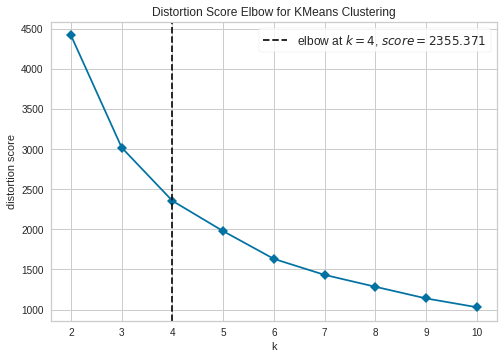

In [ ]:

plot_model(kmeans, plot = 'elbow')

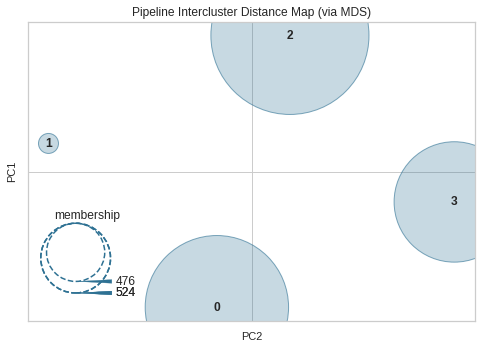

In [ ]:
plot_model(kmeans, plot = 'distance')

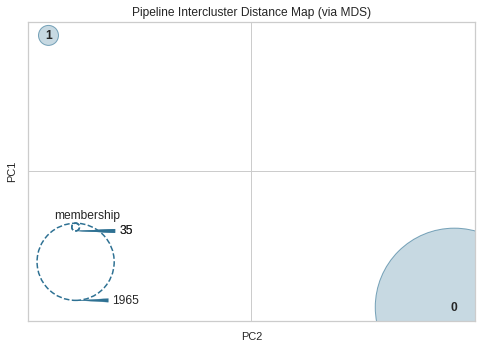

In [ ]:
plot_model(meanshift, plot = 'distance')

In [ ]:
plot_model(kmeans, plot = 'cluster' )

In [ ]:
plot_model(meanshift, plot = 'cluster')

### Atribuindo o modelo

In [98]:
kmeans_resultado = assign_model(kmeans)
kmeans_resultado.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,Cluster
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,Cluster 1
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,Cluster 0
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,Cluster 1
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996,Cluster 0
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104,Cluster 1


In [16]:
kmeans_resultado_1 = assign_model(kmeans_1)
kmeans_resultado_1.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,Cluster
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,Cluster 0
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,Cluster 1
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,Cluster 0
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996,Cluster 0
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104,Cluster 0


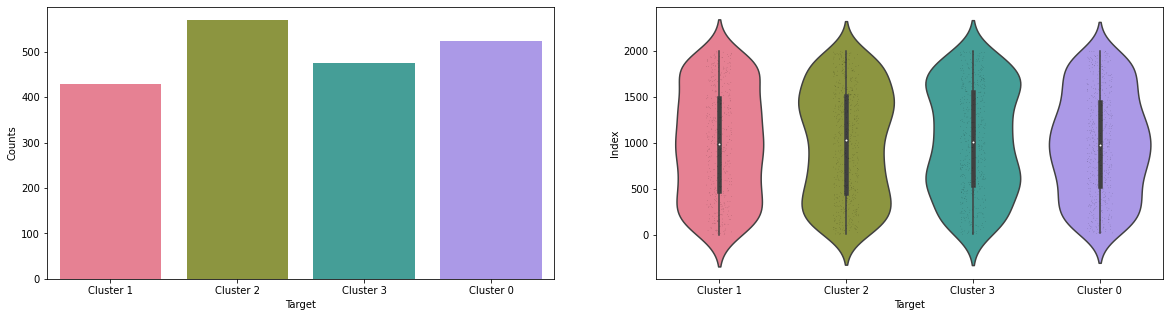

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(kmeans_resultado.Cluster.values, ax=ax[0], palette="husl")
sns.violinplot(x=kmeans_resultado.Cluster.values, y=kmeans_resultado.index.values, ax=ax[1], palette="husl")
sns.stripplot(x=kmeans_resultado.Cluster.values, y=kmeans_resultado.index.values,
              jitter=True, ax=ax[1], color="black", size=0.5, alpha=0.5)
ax[1].set_xlabel("Target")
ax[1].set_ylabel("Index");
ax[0].set_xlabel("Target")
ax[0].set_ylabel("Counts");

In [ ]:
kmeans_resultado[['Cluster', 'ID_code']].groupby(['Cluster']).count()

,ID_code
Cluster,
Cluster 0,524
Cluster 1,430
Cluster 2,570
Cluster 3,476


In [ ]:
cluster0= print(round(524/2000*100,2 ), '%')

26.2 %


In [ ]:
cluster1= print(round(430/2000*100,2 ), '%')

21.5 %


In [ ]:
cluster2= print(round(570/2000*100,2 ), '%')

28.5 %


In [ ]:
cluster3= print(round(476/2000*100,2 ), '%')

23.8 %


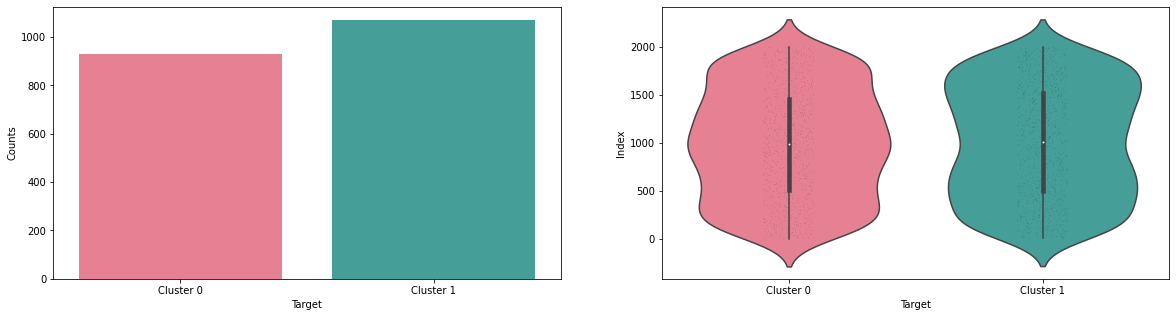

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(kmeans_resultado_1.Cluster.values, ax=ax[0], palette="husl")
sns.violinplot(x=kmeans_resultado_1.Cluster.values, y=kmeans_resultado.index.values, ax=ax[1], palette="husl")
sns.stripplot(x=kmeans_resultado_1.Cluster.values, y=kmeans_resultado.index.values,
              jitter=True, ax=ax[1], color="black", size=0.5, alpha=0.5)
ax[1].set_xlabel("Target")
ax[1].set_ylabel("Index");
ax[0].set_xlabel("Target")
ax[0].set_ylabel("Counts");

In [ ]:
kmeans_resultado_1[['Cluster', 'ID_code']].groupby(['Cluster']).count()

,ID_code
Cluster,
Cluster 0,929
Cluster 1,1071


In [ ]:
cluster_1 = print(1071/2000*100, '%')

53.55 %


In [ ]:
cluster_0 = print(929/2000*100, '%')

46.45 %


### Ajustando o modelo 

In [99]:
tuned_kmeans = tune_model(model = 'kmeans', supervised_target = 'target' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.905,0.5234,0.0,0.0,0.0,0.0,0.0
2,0.905,0.5134,0.0,0.0,0.0,0.0,0.0
4,0.905,0.5053,0.0,0.0,0.0,0.0,0.0
5,0.905,0.5806,0.0,0.0,0.0,0.0,0.0
6,0.905,0.5226,0.0,0.0,0.0,0.0,0.0
8,0.905,0.5491,0.0,0.0,0.0,0.0,0.0
10,0.905,0.4849,0.0,0.0,0.0,0.0,0.0
14,0.905,0.5144,0.0,0.0,0.0,0.0,0.0
18,0.905,0.5152,0.0,0.0,0.0,0.0,0.0
25,0.905,0.5446,0.0,0.0,0.0,0.0,0.0


### Predict model

In [27]:

predicao = predict_model(tuned_kmeans, data=train_test)
predicao.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,Cluster
1000,train_1000,8.5826,-8.3369,10.1053,10.2773,12.3695,-0.5861,4.6452,21.4091,-4.7384,7.9352,6.8037,-4.2993,13.6579,4.6240,4.2282,14.3977,9.5637,-11.0093,29.8587,19.3854,15.3318,15.3018,3.9714,2.2786,7.5562,13.2724,-4.8834,-3.3659,5.2959,10.2652,-6.8844,6.3780,0.9125,15.1357,11.4973,14.8459,3.1024,6.8651,18.1716,...,5.7300,5.4290,8.5103,-6.9220,21.7175,2.4122,10.2263,0.0940,5.1851,0.0764,-3.6072,14.9661,-0.6448,16.3635,13.7574,5.7103,11.3552,7.3526,1.1378,9.7033,8.6955,12.6241,1.6122,12.9741,-1.2406,12.3897,-20.9001,18.9806,0.8444,2.0163,9.2570,0.9863,3.7194,13.8578,0.8077,10.1349,9.7018,17.7495,-9.2302,Cluster 1
1001,train_1001,13.7080,-10.4985,9.1846,5.6701,12.7300,-5.8418,3.9331,18.3771,3.9768,9.8398,-4.8167,4.2061,14.2427,4.7457,9.1839,14.8513,5.9884,-0.6321,17.6229,16.4822,23.8021,17.3641,3.6543,3.7763,16.4873,13.1439,-14.1787,1.0091,6.4923,4.2734,-0.1524,12.8056,2.6476,17.9399,11.5394,2.2341,4.9386,4.1467,22.4735,...,5.6642,6.3292,8.3443,-9.5304,27.7695,2.4371,-10.6314,0.0436,5.6248,1.6213,5.8899,16.9057,5.1291,11.9069,17.0040,4.3292,7.7897,-13.6555,1.4883,-3.8633,11.3020,-6.6812,12.6704,11.7903,-1.1667,7.4246,-10.4574,10.9565,-0.1532,-3.4061,9.8111,2.8511,2.7865,19.5933,-0.4843,6.8172,8.4074,13.9751,-7.1172,Cluster 0
1002,train_1002,12.9621,0.7124,8.5301,8.3386,10.9782,3.0556,4.7670,23.1598,-1.6694,8.4942,-2.3122,-3.6822,13.9785,6.5678,11.2811,14.2298,7.2376,-0.7642,17.4206,18.6324,7.1496,26.2735,4.1470,3.8375,14.7118,13.6532,2.0361,-1.8286,5.9280,6.2494,-14.2730,7.6978,-3.4185,23.8573,11.7943,1.8310,0.4694,7.3759,4.8694,...,5.8705,3.5787,8.9341,5.3353,21.6432,2.5591,4.1879,7.2546,6.0189,3.2103,-5.0443,27.3510,-4.5530,29.4447,11.9611,-7.5366,15.4579,-7.9023,4.8296,-13.1027,8.5334,13.7558,5.0007,9.1700,-9.2842,11.4743,-0.6881,16.1950,0.0547,-2.5976,6.0758,1.9013,0.6801,20.9411,-1.6281,-5.0993,10.1068,21.3219,-6.3615,Cluster 1
1003,train_1003,13.6811,-2.4476,13.0882,8.3289,12.1988,-3.0825,7.1168,14.1075,6.7418,8.8239,1.7736,-1.6434,13.9350,10.3691,7.4251,14.2610,12.0050,-1.2932,8.2237,14.4303,19.3442,8.9393,2.4876,3.2155,13.8967,13.7201,-4.9106,0.5372,5.1083,6.1470,3.2664,8.8653,-1.6423,14.1893,11.8528,2.2072,2.8789,5.6818,11.2813,...,5.9054,6.2759,7.2821,4.0171,17.0257,3.3696,-1.9250,7.5287,5.9035,-4.3815,0.5063,24.5891,11.7893,19.4265,13.4257,-6.1674,7.2654,-8.5893,1.2843,-12.5951,10.5055,-12.7017,17.1468,5.8601,-5.4398,6.9079,-29.7729,16.7389,2.1226,11.3997,7.8981,1.6591,9.7205,22.8523,1.0557,-7.8208,10.8416,19.6183,-16.1505,Cluster 0
1004,train_1004,12.0543,6.5180,10.9406,10.8711,13.8366,-9.1280,4.4166,23.3048,-0.3642,8.2810,1.6576,0.1746,14.0811,8.0890,7.3415,14.6549,6.8885,-5.5004,25.8634,7.7485,2.0447,28.4264,3.0809,2.8649,13.6975,13.7831,-2.1768,-1.5861,6.4710,1.4108,-2.6066,10.0899,-2.4815,5.3067,11.4222,-1.3829,-1.3823,7.6133,10.1425,...,6.1200,5.5939,14.4326,-4.5578,16.8903,2.4866,-8.5608,9.4186,6.2199,1.2007,8.0960,22.9763,-2.5077,30.7024,15.1571,9.6643,6.8634,7.6991,4.6700,0.9247,11.9505,-9.1236,11.4612,21.3381,4.7309,10.0424,10.7327,4.5359,0.5744,10.9114,7.5590,2.8588,4.9739,12.6122,-1.2884,6.5470,7.8977,14.1504,7.7103,Cluster 1


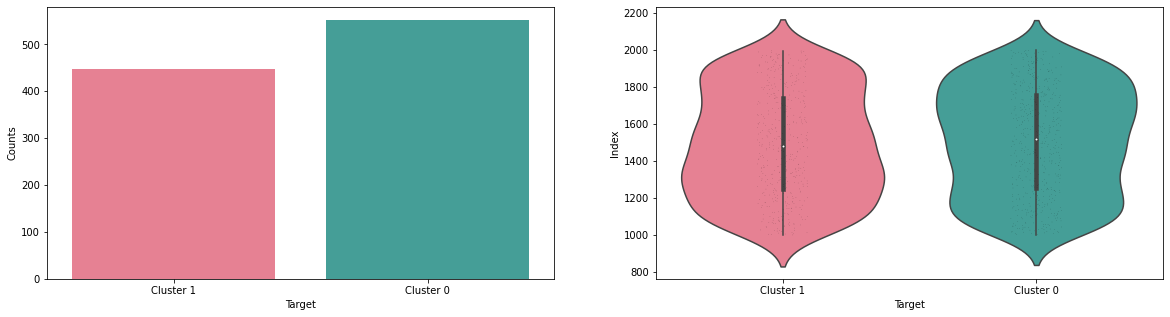

In [28]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(predicao.Cluster.values, ax=ax[0], palette="husl")
sns.violinplot(x=predicao.Cluster.values, y=predicao.index.values, ax=ax[1], palette="husl")
sns.stripplot(x=predicao.Cluster.values, y=predicao.index.values,
              jitter=True, ax=ax[1], color="black", size=0.5, alpha=0.5)
ax[1].set_xlabel("Target")
ax[1].set_ylabel("Index");
ax[0].set_xlabel("Target")
ax[0].set_ylabel("Counts");

In [29]:
predicao[['Cluster', 'ID_code']].groupby(['Cluster']).count()

,ID_code
Cluster,
Cluster 0,552
Cluster 1,448


In [30]:
Cluster_pred_0 = print(round(458/1000*100, 2), '%')

45.8 %


In [31]:
Cluster_pred_1 = print(round(542/1000*100, 2), '%')

54.2 %


### Análise
<p>  Os dados estão balanceados quase na mesma proporção e temos uma acurácia de 90%</p>

 ## 4.0 Verificando Outliers 

In [32]:
def normal(df, col, threshold=0.05):
    try:
        zscore, p_value = stats.normaltest(df[col])
        if p_value < threshold:
            result = 'not_normal'
        else:
            result = 'normal'
    except:
        zscore = p_value = np.nan
        result = 'not_applicable'
    return result

def outliers_count_IQR(df, col):
    try:
        if len(df[col].unique())>2: # if para eliminar features binárias
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr_range = q3 - q1
            lower = q1 - 1.5*iqr_range
            upper = q3 + 1.5*iqr_range
            out_low = df[df[col] < lower].count()[0]
            out_up = df[df[col] > upper].count()[0]
            outliers = out_low + out_up
            outliers_perc = round(outliers / df.shape[0],2)
        else:
            outliers = np.nan
            outliers_perc = np.nan
    except:
        outliers = np.nan
        outliers_perc = np.nan
    return outliers, outliers_perc

def EDA_morestats(df):
    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    

 
    colunas = df.columns.tolist()
    
        
    eda_df['Amount_Unique'] = pd.Series(map(lambda x: len(df[x].unique().tolist()), colunas), index=colunas)
    
    
    eda_df['Amount_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[0], colunas), index=colunas)
    eda_df['%_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[1], colunas), index=colunas)
    df = pd.DataFrame(eda_df)
    return df.loc[colunas,:]

In [33]:
EDA_morestats(train).iloc[:50]

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Amount_Outliers,%_Outliers
ID_code,0,0.0,object,695,695,NaN,NaN
target,0,0.0,int64,695,2,NaN,NaN
var_0,0,0.0,float64,695,692,2.0,0.0
var_1,0,0.0,float64,695,694,0.0,0.0
var_2,0,0.0,float64,695,692,0.0,0.0
var_3,0,0.0,float64,695,692,0.0,0.0
var_4,0,0.0,float64,695,693,0.0,0.0
var_5,0,0.0,float64,695,693,0.0,0.0
var_6,0,0.0,float64,695,687,2.0,0.0
var_7,0,0.0,float64,695,692,0.0,0.0


In [ ]:
EDA_morestats(train).iloc[50:100]

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Amount_Outliers,%_Outliers
var_48,0,0.0,float64,2000,1997,2.0,0.0
var_49,0,0.0,float64,2000,1991,0.0,0.0
var_50,0,0.0,float64,2000,1922,2.0,0.0
var_51,0,0.0,float64,2000,1995,1.0,0.0
var_52,0,0.0,float64,2000,1991,4.0,0.0
var_53,0,0.0,float64,2000,1932,0.0,0.0
var_54,0,0.0,float64,2000,1997,0.0,0.0
var_55,0,0.0,float64,2000,1994,0.0,0.0
var_56,0,0.0,float64,2000,1985,1.0,0.0
var_57,0,0.0,float64,2000,1938,2.0,0.0


In [ ]:
EDA_morestats(train).iloc[100:150]

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Amount_Outliers,%_Outliers
var_98,0,0.0,float64,2000,1919,2.0,0.00
var_99,0,0.0,float64,2000,1978,0.0,0.00
var_100,0,0.0,float64,2000,1990,0.0,0.00
var_101,0,0.0,float64,2000,1988,0.0,0.00
var_102,0,0.0,float64,2000,1990,0.0,0.00
var_103,0,0.0,float64,2000,1754,1.0,0.00
var_104,0,0.0,float64,2000,1969,5.0,0.00
var_105,0,0.0,float64,2000,1930,12.0,0.01
var_106,0,0.0,float64,2000,1967,7.0,0.00
var_107,0,0.0,float64,2000,1989,0.0,0.00


In [ ]:
EDA_morestats(train).iloc[150:220]

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Amount_Outliers,%_Outliers
var_148,0,0.0,float64,2000,1752,4.0,0.00
var_149,0,0.0,float64,2000,1994,1.0,0.00
var_150,0,0.0,float64,2000,1981,0.0,0.00
var_151,0,0.0,float64,2000,1977,0.0,0.00
var_152,0,0.0,float64,2000,1980,6.0,0.00
var_153,0,0.0,float64,2000,1981,0.0,0.00
var_154,0,0.0,float64,2000,1987,0.0,0.00
var_155,0,0.0,float64,2000,1992,3.0,0.00
var_156,0,0.0,float64,2000,1947,0.0,0.00
var_157,0,0.0,float64,2000,1991,1.0,0.00


In [34]:
from pycaret.anomaly import *

 ### tratando as anomalias 

In [35]:

outliers = setup(train, normalize = True, normalize_method=  'zscore',
                   ignore_features = ['target'],  pca=True, pca_method = 'linear',
                   session_id = 3690 )

,Description,Value
0,session_id,3690
1,Original Data,"(695, 202)"
2,Missing Values,True
3,Numeric Features,200
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(695, 195)"
9,CPU Jobs,-1


In [ ]:
outliers

(False,
 3690,
 'anomaly-default-name',
       Component_1  Component_2  ...  Component_197  Component_198
 0       -1.799517    -0.602892  ...      -0.194564      -1.059985
 1       -2.467148     2.410429  ...      -0.111603       0.307952
 2       -0.162433    -1.398841  ...      -1.041068       1.535163
 3       -0.961504    -0.394578  ...      -0.269778      -0.358530
 4        2.238832     1.185508  ...       0.678907      -0.053308
 ...           ...          ...  ...            ...            ...
 1995     0.506803    -1.260511  ...       0.442289       0.158313
 1996    -0.464859     0.582556  ...      -0.559736      -0.404051
 1997    -0.859392    -0.151017  ...      -0.509226       0.553907
 1998    -1.450121     1.668729  ...      -0.287414      -0.707828
 1999     3.771080    -0.747537  ...      -0.798735      -0.686059
 
 [2000 rows x 198 columns],
 {'tsne': 'Anomaly TSnE (3d)', 'umap': 'UMAP Dimensionality'},
 [],
 'UNSUPERVISED_DUMMY_TARGET',
 {'abod': <pycaret.container

In [36]:
models( )

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [37]:
abod = create_model('abod',fraction=0.05 )

In [ ]:
abod

ABOD(contamination=0.05, method='fast', n_neighbors=5)

In [38]:
cluster =create_model('cluster',fraction=0.05 )
cluster

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.05, n_clusters=8, n_jobs=-1, random_state=3690,
   use_weights=False)

In [ ]:
iforest = create_model('iforest',fraction=0.05)
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=3690, verbose=0)

In [39]:
plot_model(abod)

In [ ]:
plot_model(cluster)

In [ ]:
plot_model(abod, plot='umap')

### Análise :
<p> Olhando os gráficos a gente consegue identificar que temos alguns outliers</p>

### Atribuindo o modelo

In [41]:
aplicando_modelo = assign_model(abod)

In [42]:
aplicando_modelo[['Anomaly', 'ID_code']].groupby(['Anomaly']).count()

,ID_code
Anomaly,
0,660
1,35


In [43]:

ajuste = tune_model(model ='abod',  supervised_target='target')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0.00,0.8562,0.6537,0.1762,0.1935,0.1801,0.1052,0.1057
0.01,0.8518,0.6416,0.1612,0.1787,0.1688,0.0907,0.0895
0.02,0.8576,0.6288,0.1648,0.1987,0.1798,0.1060,0.1047
0.03,0.8590,0.6225,0.1595,0.1810,0.1688,0.0977,0.0954
0.04,0.8802,0.6972,0.2329,0.2756,0.2437,0.1840,0.1872
0.05,0.8818,0.7149,0.1976,0.2392,0.2116,0.1536,0.1546
0.06,0.8866,0.7171,0.2476,0.2933,0.2622,0.2067,0.2086
0.07,0.8901,0.7457,0.1986,0.2867,0.2195,0.1700,0.1777
0.08,0.8858,0.7293,0.1822,0.2700,0.2144,0.1594,0.1629
0.09,0.8829,0.7337,0.1825,0.2500,0.2074,0.1488,0.1514


In [45]:

predicao_out = predict_model(ajuste, data=train)
predicao_out.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,Anomaly,Anomaly_Score
0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,...,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,0,-20553.034321
1,train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,...,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,0,-8512.780775
2,train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,...,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,0,-11116.744086
3,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,...,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996,0,-11705.846714
4,train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,...,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104,0,-5632.700077


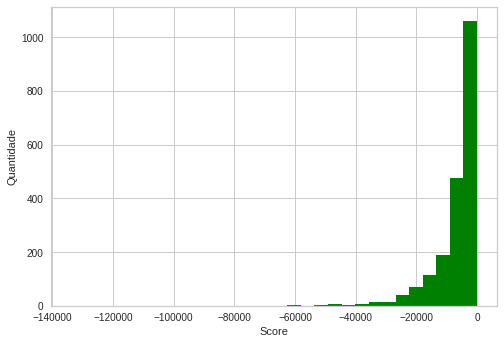

In [ ]:
plt.hist(predicao_out['Anomaly_Score'], bins=30, color= 'Green')
plt.xlabel('Score')
plt.ylabel('Quantidade')
plt.show()

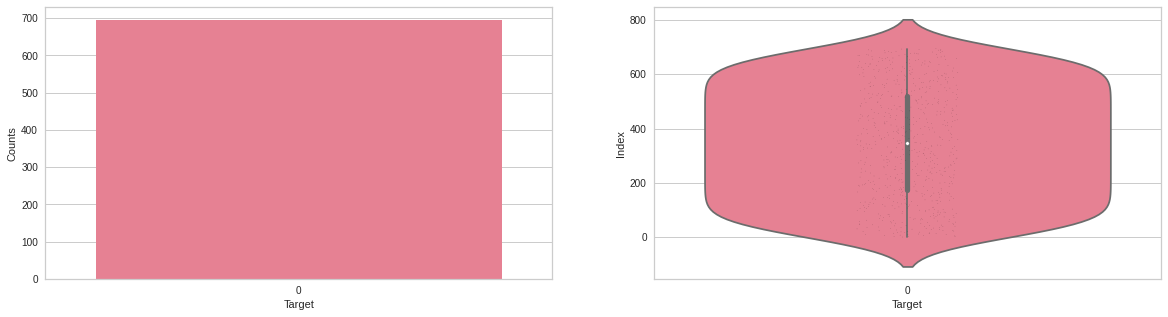

In [48]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(predicao_out.Anomaly.values, ax=ax[0], palette="husl")
sns.violinplot(x=predicao_out.Anomaly.values, y=predicao_out.Anomaly.index.values, ax=ax[1], palette="husl")
sns.stripplot(x=predicao_out.Anomaly.values, y=predicao_out.Anomaly.index.values,
              jitter=True, ax=ax[1], color="black", size=0.5, alpha=0.5)
ax[1].set_xlabel("Target")
ax[1].set_ylabel("Index");
ax[0].set_xlabel("Target")
ax[0].set_ylabel("Counts");

In [ ]:
predicao_out[['Anomaly', 'ID_code']].groupby(['Anomaly']).count()

,ID_code
Anomaly,
0,2000


### Salvando o modelo

In [83]:
test.shape

(13226, 201)

In [100]:
save_model(tuned_kmeans,'Final KMeann')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['target'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_nu...
                  Reduce_Dimensions_For_Supervised_Path(method='pca_liner',
                                                        random_state=123,
                                                        target='UNSUPERVISED_DUMMY_TARGET',
                          

### Carregando o modelo

In [101]:
salvando = load_model('Final KMeann')

Transformation Pipeline and Model Successfully Loaded


In [102]:
novas_predicoes = predict_model(salvando, data=test)

In [105]:
novas_predicoes.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,Cluster
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,Cluster 1
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,Cluster 1
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,Cluster 0
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,Cluster 0
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,Cluster 1


In [103]:
novas_predicoes.shape

(13226, 202)

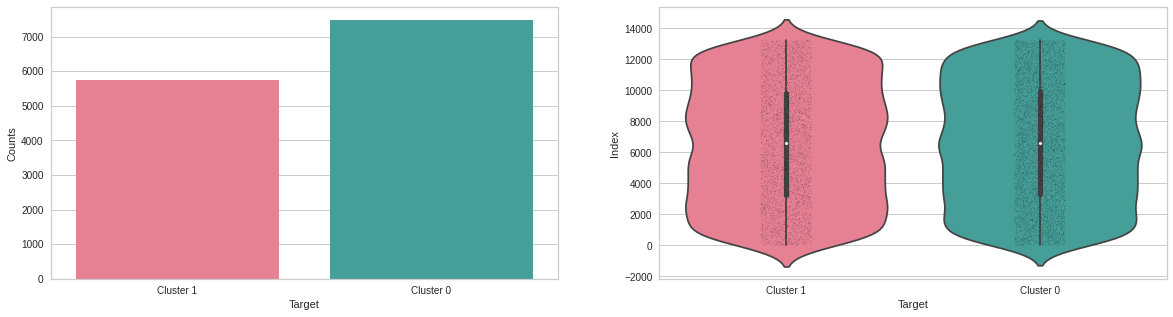

In [106]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(novas_predicoes.Cluster.values, ax=ax[0], palette="husl")
sns.violinplot(x=novas_predicoes.Cluster.values, y=novas_predicoes.Cluster.index.values, ax=ax[1], palette="husl")
sns.stripplot(x=novas_predicoes.Cluster.values, y=novas_predicoes.Cluster.index.values,
              jitter=True, ax=ax[1], color="black", size=0.5, alpha=0.5)
ax[1].set_xlabel("Target")
ax[1].set_ylabel("Index");
ax[0].set_xlabel("Target")
ax[0].set_ylabel("Counts");

In [108]:
novas_predicoes[['Cluster', 'ID_code']].groupby(['Cluster']).count()

,ID_code
Cluster,
Cluster 0,7485
Cluster 1,5741


In [110]:
anomaly_npred_0=  print(round(7485/13226*100, 2), '%')

56.59 %


In [111]:
Cluster_n_pred_1 =  print(round(5741/13226*100, 2), '%')

43.41 %


### 5.0 Salvando asp previsões em um arquivo CSV

In [ ]:
test['target'] = 'NaN'

In [112]:
Submission_1 = pd.DataFrame()

In [113]:
Submission_1['ID_code'] = test['ID_code']


In [114]:
Submission_1['target'] = salvando.predict(test)

In [115]:
Submission_1.head()

,ID_code,target
0,test_0,1
1,test_1,1
2,test_2,0
3,test_3,0
4,test_4,1


In [116]:
Submission_1.target.value_counts()

0    7485
1    5741
Name: target, dtype: int64

In [117]:
Submission_1.to_csv('submission_1.csv', index=False)